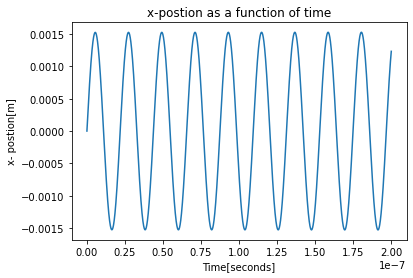

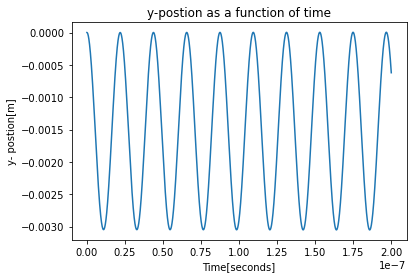

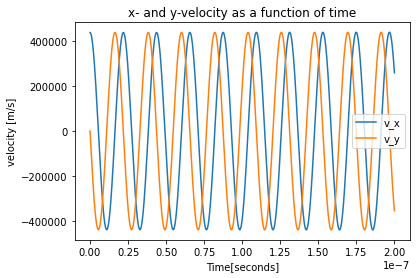

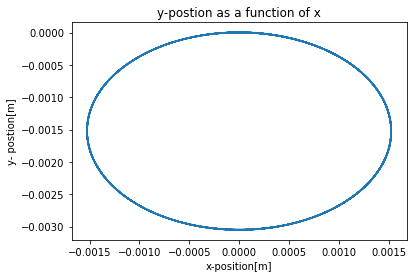

In [13]:
import numpy as np 
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import scipy.constants as const


#Q1
times = (0, 2e-7)# Time range
ttt = np.linspace(0, 2e-7, 10000) 
E= 1.6022e-16 #energy of 1 MeV expressedin joules
m =1.673e-27 #mass of proton in kg
y= [0,0,0, np.sqrt(2*E/m),0,0] #initial position and velocity. Velocity obtained through formula for kinetic energy.
B= [0,0,3]#Magnetic field in T

def func_q1(t,y): 
    """ 
    Function to be used in ODE-solver 
    Input: t -  time[seconds]
           y - Initial position and velocity
    Output: z - vector containing velocity [:3] and accelerataion [3:]
    """
    y=np.array(y)
    z= np.zeros(6)
    z[:3] = y[3:]
    E= (y[3:]**2)*m*0.5
    z[3:] = (const.e *(E + np.cross(y[3:],B) ))/m
    return z

motion = solve_ivp(func_q1, times, y, t_eval=ttt)#evaluated the motion of the particl using solve_ivp and func_q1

#plot the results
plt.figure()
plt.plot(motion.t, motion.y[0])
plt.xlabel('Time[seconds]')
plt.ylabel('x- postion[m]')
plt.title('x-postion as a function of time')
plt.savefig('Q1_x(t)')#save the plot

plt.figure()
plt.plot(motion.t, motion.y[1])
plt.xlabel('Time[seconds]')
plt.ylabel('y- postion[m]')
plt.title('y-postion as a function of time')
plt.savefig('Q1_y(t)')#save the plot



plt.figure()
plt.plot(motion.t, motion.y[3])
plt.plot(motion.t, motion.y[4])
plt.xlabel('Time[seconds]')
plt.ylabel('velocity [m/s]')
plt.legend(['v_x', 'v_y'])
plt.title('x- and y-velocity as a function of time')
plt.savefig('Q1_v(t)')#save the plot


figure = plt.figure()
plt.plot(motion.y[0], motion.y[1])
plt.xlabel('x-position[m]')
plt.ylabel('y- postion[m]')
plt.title('y-postion as a function of x')
figure.savefig('Q1_y(x)')#save the plot
plt.show()

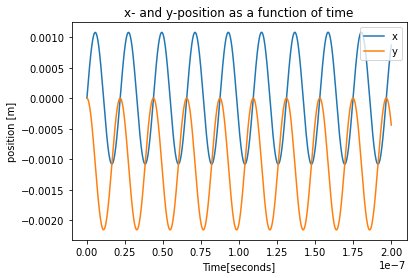

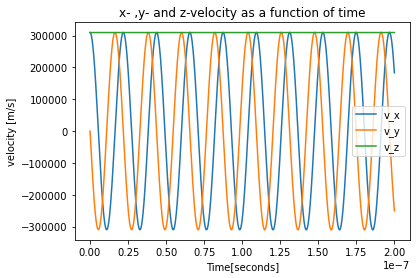

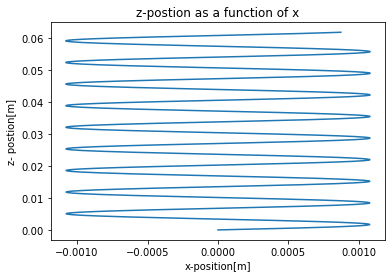

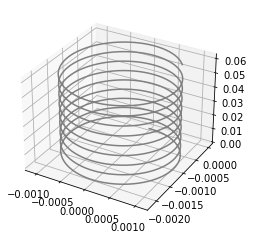

In [14]:

#Q2
#same input param except energy
times = (0, 2e-7)# Time range
ttt = np.linspace(0, 2e-7, 10000) 
E= 1.6022e-16
m =1.673e-27
y= [0,0,0, np.sqrt(E/m),0,np.sqrt(E/m)]#add veloity in z-direction
B= [0,0,3] 


motion = solve_ivp(func_q1, times, y, t_eval=ttt) #evaluate motion of particle


#plot results
plt.figure()
plt.plot(motion.t, motion.y[0])
plt.plot(motion.t, motion.y[1])
plt.xlabel('Time[seconds]')
plt.ylabel('position [m]')
plt.legend(['x', 'y'])
plt.title('x- and y-position as a function of time')
plt.savefig('Q2_x,y(t)')#save the plot


plt.figure()
plt.plot(motion.t, motion.y[3])
plt.plot(motion.t, motion.y[4])
plt.plot(motion.t, motion.y[5])
plt.xlabel('Time[seconds]')
plt.ylabel('velocity [m/s]')
plt.legend(['v_x', 'v_y','v_z'])
plt.title('x- ,y- and z-velocity as a function of time')
plt.savefig('Q2_v(t)')#save the plot

plt.figure()
plt.plot(motion.y[0], motion.y[2])
plt.xlabel('x-position[m]')
plt.ylabel('z- postion[m]')
plt.title('z-postion as a function of x')
plt.savefig('Q2_y(x)')#save the plot
plt.show()

#Q4
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = plt.axes(projection='3d') #enable 3D-axis

ax.plot3D(motion.y[0], motion.y[1], motion.y[2], 'gray') #plot the results
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')



438469.63902074035


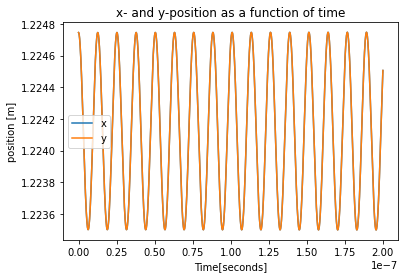

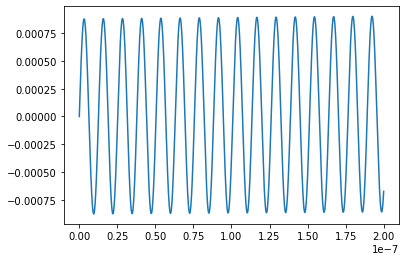

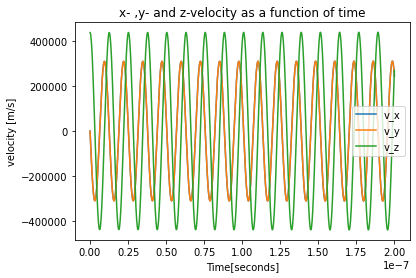

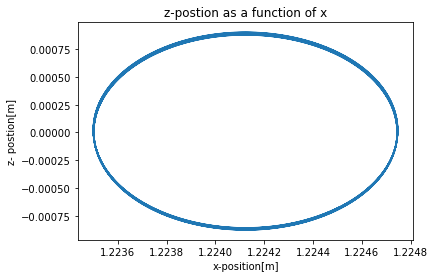

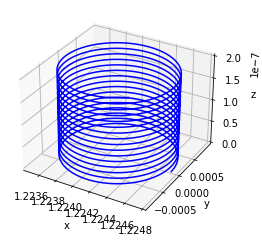

In [23]:
#Q3
def magnetic_field(x,y):
    """
    Function to calculate magnetic field strength at given x- and y-coordinates.
    
    Input: x and y coordinates
           x-float,int
           y-float,int
    Output: 3D np.array with the magnetic field
    """
    if x==0 and y==0:
        return np.zeros(3) #to avoid division by 0
    else:
        B_strength = 9/(np.sqrt(x**2+y**2)) #Strength of magnetic field where R=sqrt(x^2+y^2)
        B = B_strength* np.array([-y/(np.sqrt(x**2+y**2)),x/(np.sqrt(x**2+y**2)),0]) #magnetic field with unit T
        return B
    
def func_q3(t,y): #slightly modified from q1 to include magnetic_field(x,y) instead of B
    """ 
    Function to be used in ODE-solver 
    Input: t - Initial time[seconds]
           y - Initial position and velocity
    Output: z - vector containing velocity [:3] and accelerataion [3:]
    """
    y=np.array(y)
    z= np.zeros(6)
    z[:3] = y[3:]
    E= (y[3:]**2)*m*0.5
    z[3:] = (const.e *(E + np.cross(y[3:],magnetic_field(y[0], y[1])) ))/m
  
    return z

times = (0, 2e-7)# Time range
ttt = np.linspace(0, 2e-7, 10000) 
E= 1.6022e-16
m =1.673e-27
y= [np.sqrt(1.5),np.sqrt(1.5),0, 0,0,np.sqrt(2*E/m)]#initial conditions with R=3 and velocity in z-direction

motion = solve_ivp(func_q3, times, y, t_eval=ttt)


#plot results
plt.figure()
plt.plot(motion.t, motion.y[0])
plt.plot(motion.t, motion.y[1])
plt.xlabel('Time[seconds]')
plt.ylabel('position [m]')
plt.legend(['x', 'y'])
plt.title('x- and y-position as a function of time')
plt.savefig('Q3_x,y(t)')#save the plot


plt.figure()
plt.plot(motion.t, motion.y[2])

plt.figure()
plt.plot(motion.t, motion.y[3])
plt.plot(motion.t, motion.y[4])
plt.plot(motion.t, motion.y[5])
plt.xlabel('Time[seconds]')
plt.ylabel('velocity [m/s]')
plt.legend(['v_x', 'v_y','v_z'])
plt.title('x- ,y- and z-velocity as a function of time')
plt.savefig('Q3_v(t)')#save the plot

plt.figure()
plt.plot(motion.y[1], motion.y[2])
plt.xlabel('x-position[m]')
plt.ylabel('z- postion[m]')
plt.title('z-postion as a function of x')
plt.savefig('Q3_z(x)')#save the plot

#Q5
fig = plt.figure()
ax = plt.axes(projection='3d') #enable 3D-axis

ax.plot3D(motion.y[0], motion.y[2], motion.t, 'blue') #plot the results
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.savefig('Q5')#save the plot

#Q6
drift = np.mean(np.sqrt( motion.y[3]**2 + motion.y[4]**2+ motion.y[5]**2))
print(drift)

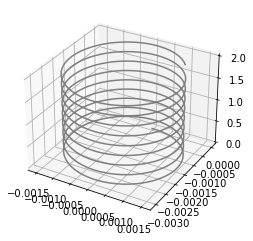

In [22]:
9/(np.sqrt(x^2+y^2))

<ipython-input-22-c88737ab12ce>:1: RuntimeWarning: divide by zero encountered in double_scalars
  9/(np.sqrt(x^2+y^2))


inf

In [23]:
np.sqrt(x^2+y^2)

0.0